## Exploring Avocado Data and Building Predictive Models

### Purpose of data exploration: Compare the average prices of avocado by cities and find which cities have the highest and lowest costs.

### Goal of machine-learning model building: Based on the data, train and build the models to predict the prices.

### Preparation

### 1. Importing the data and parsing the data column

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
%matplotlib inline

## When using Google colab:
# from google.colab import drive 
# drive.mount('/content/gdrive')


avo = pd.read_csv('avocado.csv')

In [14]:
## Parsing Date to datetime
def parse_date(d):
     return pd.to_datetime(d, format='%Y-%m-%d')

avo['Date'] = avo['Date'].apply(parse_date)

In [13]:
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Data Exploration 

### 1: Correlation between the average price of avocado and total volumes of sold avocados

In [66]:
## Trying to see the correlation between the average price of avaocado and total volumes of sold avocados. 
## See the scatterplot below.

x=avo.groupby('region')[['AveragePrice']].mean()
y=np.log(avo.groupby("region")[['Total Volume']].mean())


In [67]:
## Dropping larger regions' data mixed within the original data to just extract only cities' data

x = x.drop(['Midsouth', 'Northeast','Southeast','West','TotalUS', 'Plains', 'California'], axis=0)
y = y.drop(['Midsouth', 'Northeast','Southeast','West','TotalUS', 'Plains', 'California'], axis=0)

### Based on the scatterplot below, it seems there is a cluster around the middle, but there seems no strong correlation between the volume and average price. Some of the cities had exceptionally higher prices.

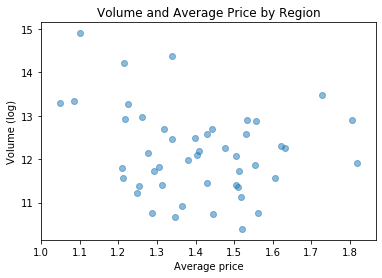

In [68]:
fig_dims = (12, 6)

plt.scatter(x, y, alpha=0.5)
plt.title('Volume and Average Price by Region')
plt.xlabel('Average price')
plt.ylabel('Volume (log)')
plt.savefig('Volume and average')
plt.show()

In [69]:
from scipy.stats import pearsonr
corr, _ = pearsonr(x['AveragePrice'], y['Total Volume']) 
print('Pearsons correlation: %.3f' % corr) 

Pearsons correlation: -0.225


### 2: correlation heatmaps between features


### Based on the heatmap below, it seems there is no positive correlation between the average price and total sold volume.

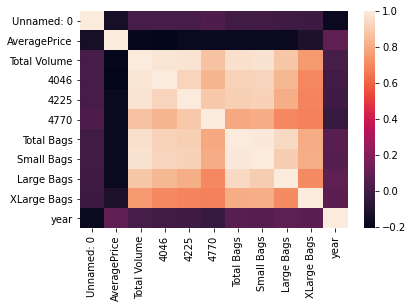

In [23]:
avo_hmp = avo.select_dtypes(exclude='object')
corr = avo_hmp.corr() 
sns.heatmap(corr) 
plt.show()

### 3: Consumption Volume

### 3-1: Ranking by Volume

In [5]:
#Region (vs cities) categories are based on the Hass Avocado Board website: https://hassavocadoboard.com/category-data/


indexNames = avo.loc[ (avo['region'].isin(['Midsouth', 'Northeast','Southeast','West','TotalUS', 'Plains', 'California', 'SouthCentral', 'GreatLakes']))].index

avo_cities=avo.drop(indexNames)

volume_ranking=avo_cities.groupby(["region"])[['Total Volume']].sum().sort_values(by='Total Volume', ascending=False)
volume_ranking

,Total Volume
region,
LosAngeles,5.078965e+08
NewYork,2.407341e+08
DallasFtWorth,2.084193e+08
Houston,2.031679e+08
PhoenixTucson,1.956433e+08
WestTexNewMexico,1.445218e+08
Denver,1.389025e+08
SanFrancisco,1.358302e+08
BaltimoreWashington,1.347139e+08


### Top Cities by Total Volume Consumption

### Based on the below bar chart, suprisingly, Los Angeles consumes twice more than that of the second highest volume cities, New York.

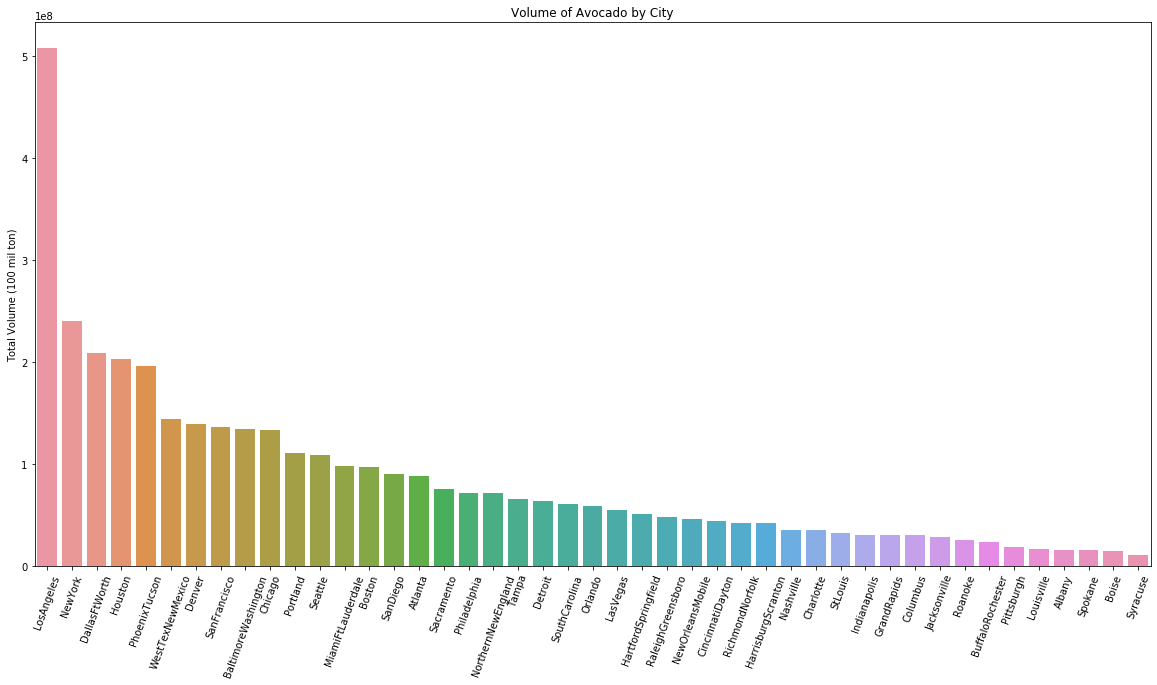

In [8]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=70)

ax = sns.barplot(x=volume_ranking.index, y="Total Volume", data=volume_ranking)
ax.set_xlabel("")
ax.set_ylabel("Total Volume (100 mil ton)")
plt.title('Volume of Avocado by City')
plt.savefig("city ranking")

In [27]:
## Checking if the ranking changes if ranked by the average volume instead of total. The below ranking does not change so much.


volume_ranking2=avo_cities.groupby(["region"])[['Total Volume']].mean().sort_values(by='Total Volume', ascending=False)
volume_ranking2

,Total Volume
region,
LosAngeles,1.502653e+06
NewYork,7.122311e+05
DallasFtWorth,6.166251e+05
Houston,6.010884e+05
PhoenixTucson,5.788264e+05
WestTexNewMexico,4.314085e+05
Denver,4.109542e+05
SanFrancisco,4.018645e+05
BaltimoreWashington,3.985619e+05


### 3-2: Price Fluctuation Over Time 


### The graph shows that there was a huge drop in the price in summer, 2015. In general, it fluctuates over seasons - in summer, it goes up and in winter, it goes down. However, the plot shows that it is steadily increasing over years. 

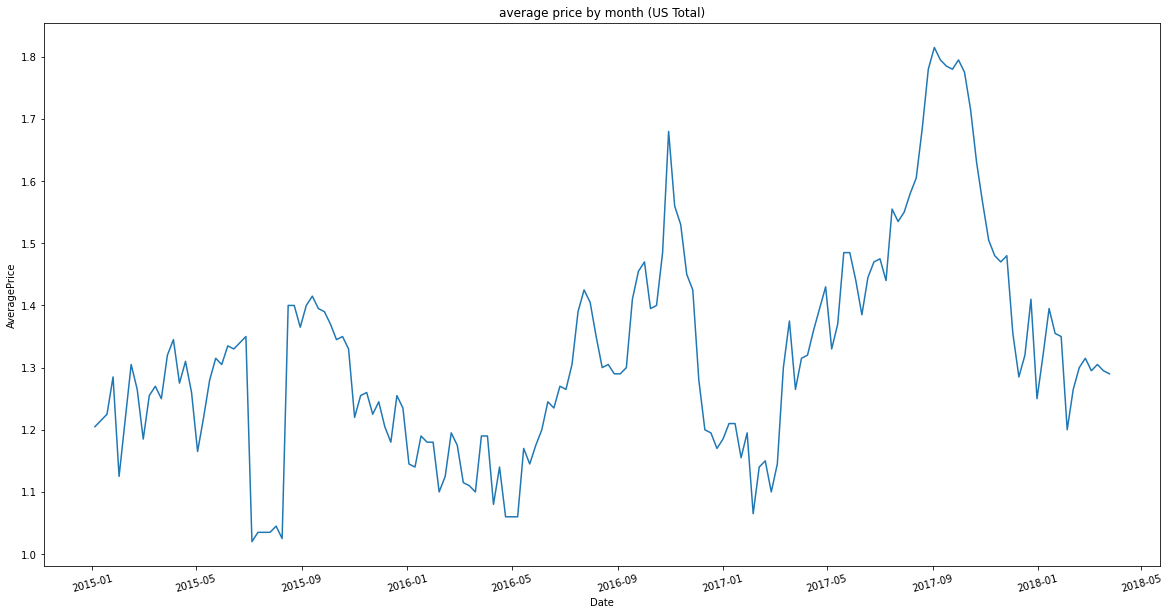

In [28]:
plt.figure(figsize=(20,10))
sns.lineplot(x=avo['Date'], y=avo[avo.region=='TotalUS']['AveragePrice'], data=avo)
plt.xticks(rotation=15)
plt.title('Average Price by Month (US Total)')

plt.show()


In [14]:
avo['rolling_']=avo[avo.region=='TotalUS']['AveragePrice'].rolling(7).mean().shift(-3)

### Now showing the chart of the rolling average to make the above chart easier to see and curb small flctuations.

##### Reference - https://datavizpyr.com/how-to-make-a-time-series-plot-with-rolling-average-in-python/

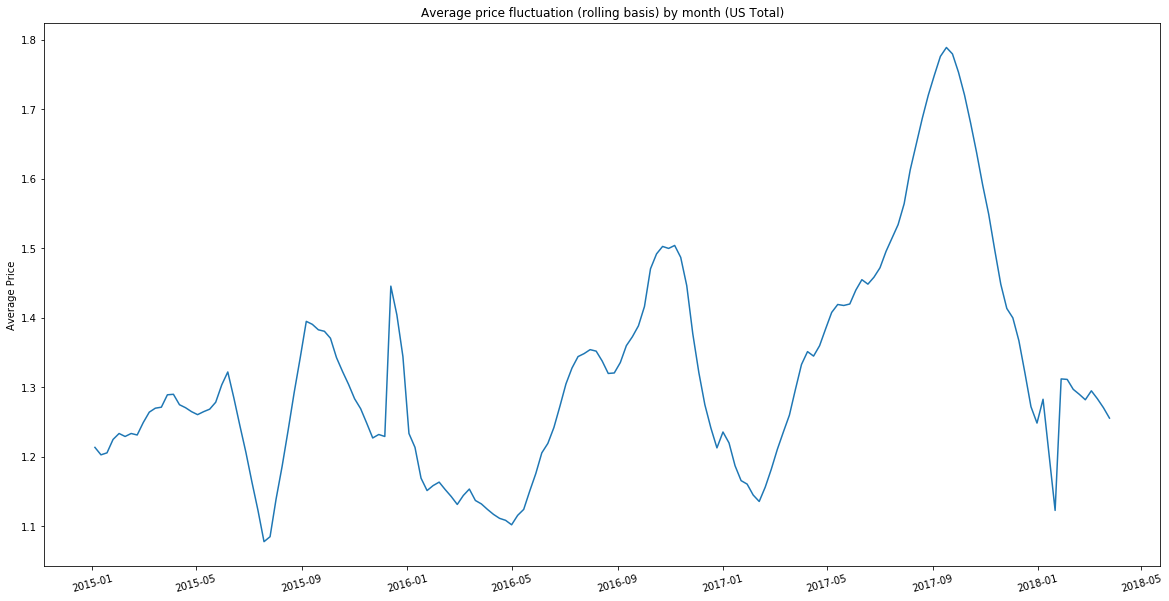

In [19]:

plt.figure(figsize=(20,10))
sns.lineplot(x=avo['Date'], y=avo['rolling_'], data=avo, ci=None)
plt.xticks(rotation=15)
plt.title('Average price fluctuation (rolling basis) by month (US Total)')
plt.xlabel('')
plt.ylabel('Average Price')
plt.savefig('Average Price')
plt.show()

In [31]:
## Time series range

print(max(avo.Date))
print(min(avo.Date))

2018-03-25 00:00:00
2015-01-04 00:00:00


### 4: Prices (Most/least expensive city ranking by average price)

### The below chart shows that Northeast and Mideast are most expensive areas. 

### It is surprising that Hartford-Springfield was the most expensive city. Also, San Francisco is geographically not so far from the production regions, but it ranked very high, even higher than New York and other Northeastern cities.

### Hypothesis: transporation costs from main production areas/regions (Mexico, CA etc.) is the major factor to drive up prices? I did a little research on the production trends of avaocado - see below.

### [Research Result]
### In 2017, world production of avocados was 5.9 million tonnes, led by Mexico with 34% (2.01 million tonnes) of the total (table). In the U.S., California is the major producer, accounting for 93 percent of U.S. avocado output. However, the most of US consumption rely on the imports from Mexico - 89% of the imports.

### Per capita consumption of avocados in the U.S. has tripled since 2001 to 8 pounds per person in 2018. This led to the increase of the imports from Mexico and South America.
#### https://www.ers.usda.gov/data-products/charts-of-note/charts-of-note/?topicId=14849


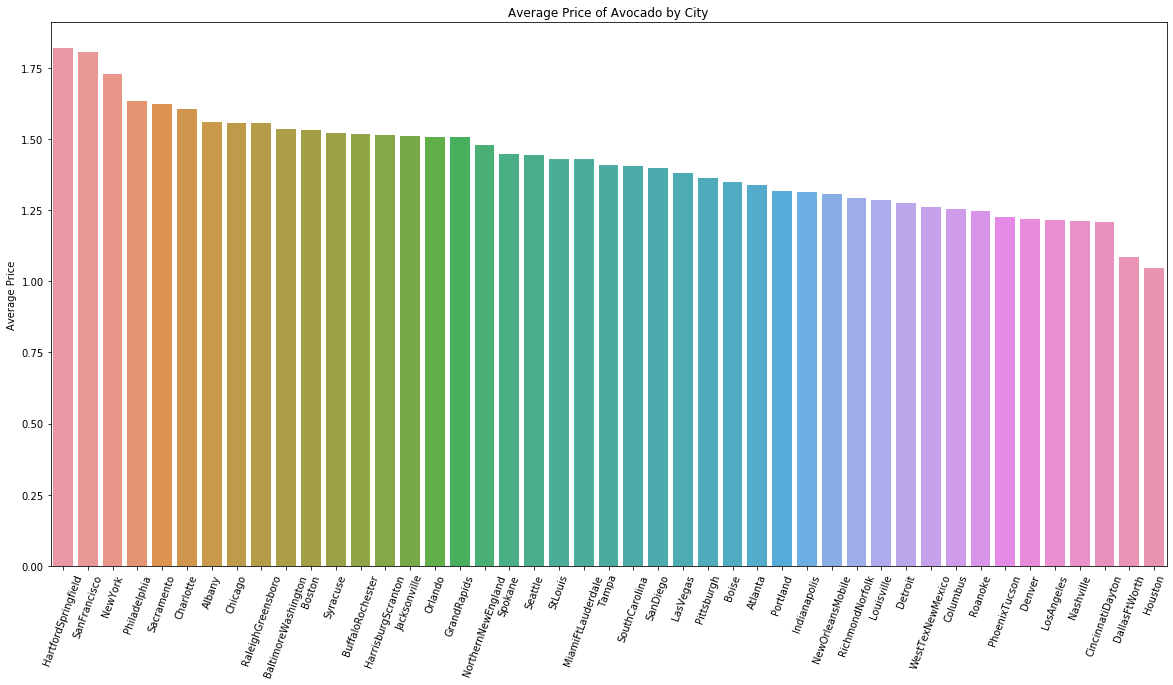

In [9]:
price_ranking=avo_cities.groupby('region')[['AveragePrice']].mean().sort_values(by="AveragePrice", ascending=False)

plt.figure(figsize=(20,10))
plt.xticks(rotation=70)

ax = sns.barplot(x=price_ranking.index, y="AveragePrice", data=price_ranking)
ax.set_xlabel('')
ax.set_ylabel("Average Price")
plt.title('Average Price of Avocado by City')
plt.savefig('price_ranking')

### Question: big metropolitan areas such as San Francisco and New york are priced really high. It is due to the fact that in general these cities are expensive?

In [36]:
## Reference cost of cities ranking in North America:


# Ranking	City	Price Index: *
# 1st	Hamilton (Bermuda)	288
# 2nd	New York City (United States)	250
# 3rd	San Francisco, California (United States)	242
# 4th	Washington D.C. (United States)	218
# 5th	Oakland, California (United States)	215
# 6th	Boston, Massachusetts (United States)	207
# 7th	Los Angeles, California (United States)	205
# 8th	Honolulu, Hawaii (United States)	201
# 9th	San Jose, California (United States)	201
# 10th	Chicago, Illinois (United States)	198
# 11th	Seattle, Washington (United States)	195
# 12th	San Diego, California (United States)	189
# 13th	Miami, Florida (United States)	188
# 14th	Denver, Colorado (United States)	187
# 15th	Portland, Oregon (United States)	186
# 16th	Anchorage, Alaska (United States)	180
# 17th	Sacramento, California (United States)	179
# 18th	Toronto (Canada)	174
# 19th	Philadelphia, Pennsylvania (United States)	171
# 20th	Vancouver (Canada)	167

### Based on the list above, Hartford, Philadelphia, Charlotte, and Raleigh (top most expensive cities of avocado) are clearly outliers in terms of avocado prices compared with other general living costs of each city.

### Texas, California and Arizona where the geographical proximity to Mexico, the highest avaocado production country, is higher than the other areas, ranked the lowest, which confirms the hypothesis. https://en.wikipedia.org/wiki/List_of_countries_by_avocado_production. 
### On the other hand, Ohio area was the lowest in the price, which does not fit into the scenario.


### 5. Conventional VS Organic

### In the data, there are two types of avocado prices (conventional and organic). Here, I created a scatter plot to show how the prices of both types are correlated by cities.

In [39]:
avo.type.unique()

array(['conventional', 'organic'], dtype=object)

In [93]:
type_= avo_cities.groupby(['region','type'])[['AveragePrice']].mean().sort_values(by='AveragePrice')
type_= type_.reset_index()
type_

,region,type,AveragePrice
0,PhoenixTucson,conventional,0.728225
1,Houston,conventional,0.825089
2,WestTexNewMexico,conventional,0.842130
3,DallasFtWorth,conventional,0.846450
4,LosAngeles,conventional,0.976450
...,...,...,...
85,Charlotte,organic,1.936982
86,Sacramento,organic,1.969172
87,NewYork,organic,2.053018
88,SanFrancisco,organic,2.211243


In [94]:
#Pivoting the dataframe to make it suitable for a scatter plot

type_2 = type_.pivot(index='region', columns='type', values='AveragePrice')\
            .reset_index()


In [95]:
type_2[type_2['region'].isin(['Midsouth', 'Northeast','Southeast','West','TotalUS', 'Plains', 'California'])].index

Int64Index([], dtype='int64')

In [96]:
type_2.drop(indexNames , inplace=True)

In [90]:

indexNames = type_2[type_2['region'].isin(['Midsouth', 'Northeast','Southeast','West','TotalUS', 'Plains', 'California'])].index

type_2=type_2.drop(indexNames , inplace=True)

In [97]:
type_2

type,region,conventional,organic
0,Albany,1.348757,1.773314
1,Atlanta,1.068817,1.607101
2,BaltimoreWashington,1.344201,1.724260
3,Boise,1.076036,1.620237
4,Boston,1.304379,1.757396
5,BuffaloRochester,1.382308,1.651361
6,Charlotte,1.275089,1.936982
7,Chicago,1.369349,1.744201
8,CincinnatiDayton,1.015503,1.402899
9,Columbus,1.066272,1.439290


### 5-1: Scatter Plot by Cities


### Organic usually runs higher than conventional prices. For some cities such as Phoenix-Tuscon and West Texas and New Mexico, compared with other cities, organic avocados are priced so much higher than the conventional ones.

#### Possible next step to verify the striking differences: create outlier cities (create a column for differences between conventional and organic & compare 2 standard deviation away from the average differences)
    

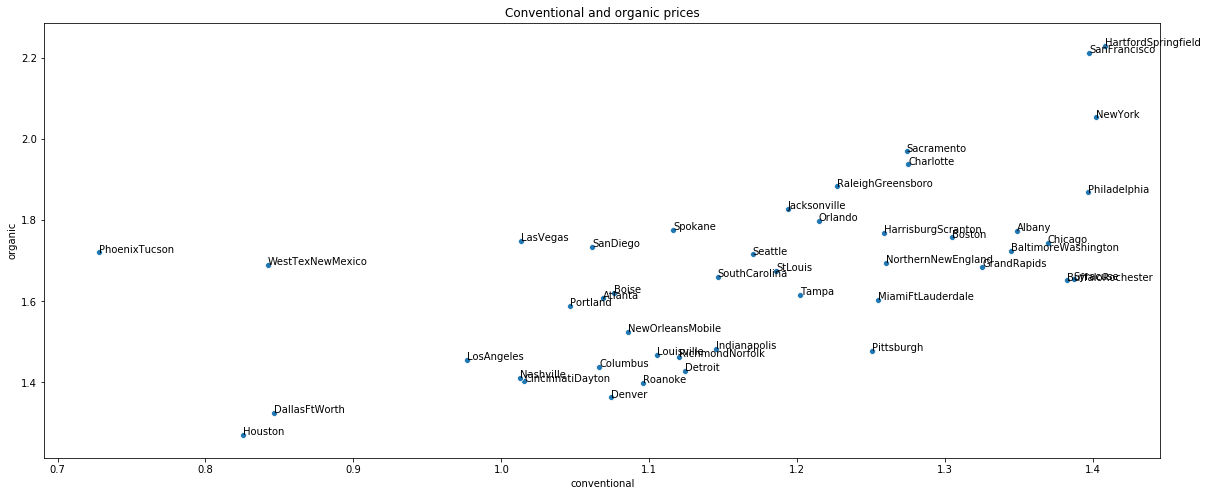

In [98]:
fig_dims = (20, 8)

fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="conventional", y="organic", data=type_2)

for i, txt in enumerate(type_2.region):
    ax.annotate(txt, (type_2.conventional[i], type_2.organic[i]))

plt.title('Conventional and organic prices')
plt.savefig('cov_org')

### 5-2: Bar plot for both conventional and organic prices

### The plot shows that Phoenix-Tucscon had a striking diffence between the conventional and organic prices.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

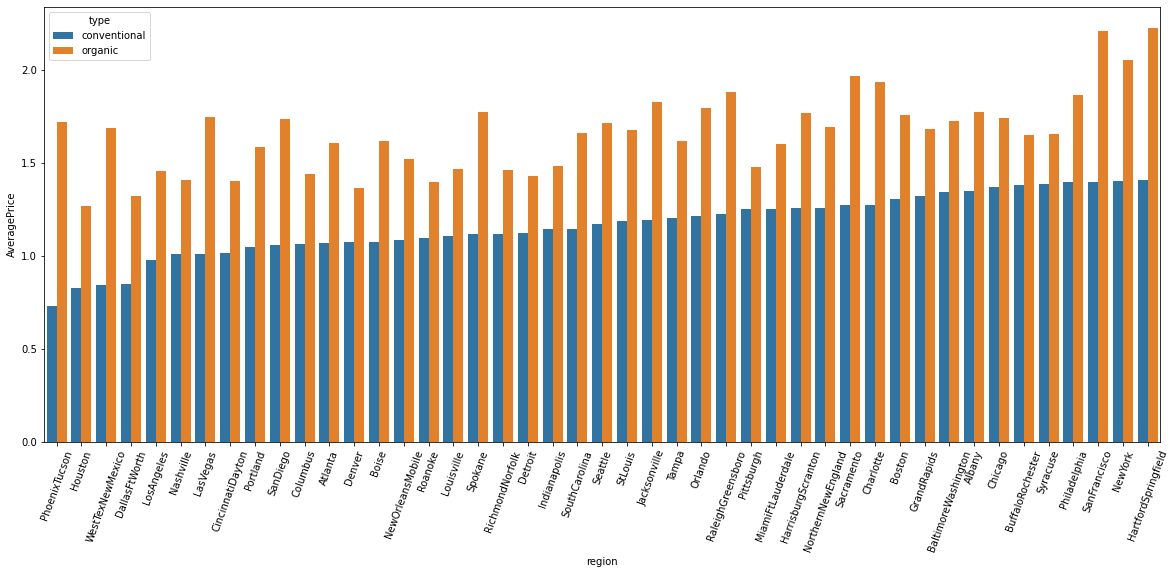

In [43]:
fig_dims = (20, 8)

fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="region", y="AveragePrice", hue='type', data=type_)
plt.xticks(rotation=70)

### 5-3: Conventional vs Organic by Year


### You can see the fluctuations on the prices by year in the below chart.

### In 2017, there was a bump in the prices for both conventional and organic. Based on the volume plot below, 2017 didn't have any increase in the amounts of volume although there was a trend in that direction over previous years.
### In 2018, there was a decrease in the price and huge increase in the volume.

### Assumption: The increase of imports from Mexico and South America led to the decrease of the prices. Since the consumed volume is hugely increaseing, it would only make sense if there was an accompanying increase of imports. Reference: https://www.bloomberg.com/news/articles/2020-12-04/avocados-are-the-pandemic-proof-crop-in-lockdown-health-craze


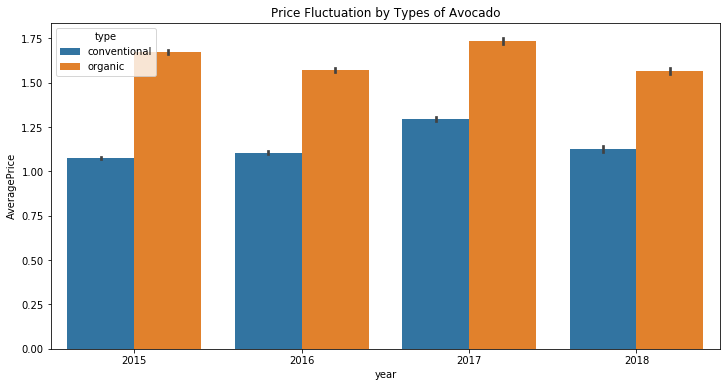

In [43]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="year", y="AveragePrice", hue="type", data=avo)
ax.set_title('Price Fluctuation by Types of Avocado')
plt.savefig('price_flu')

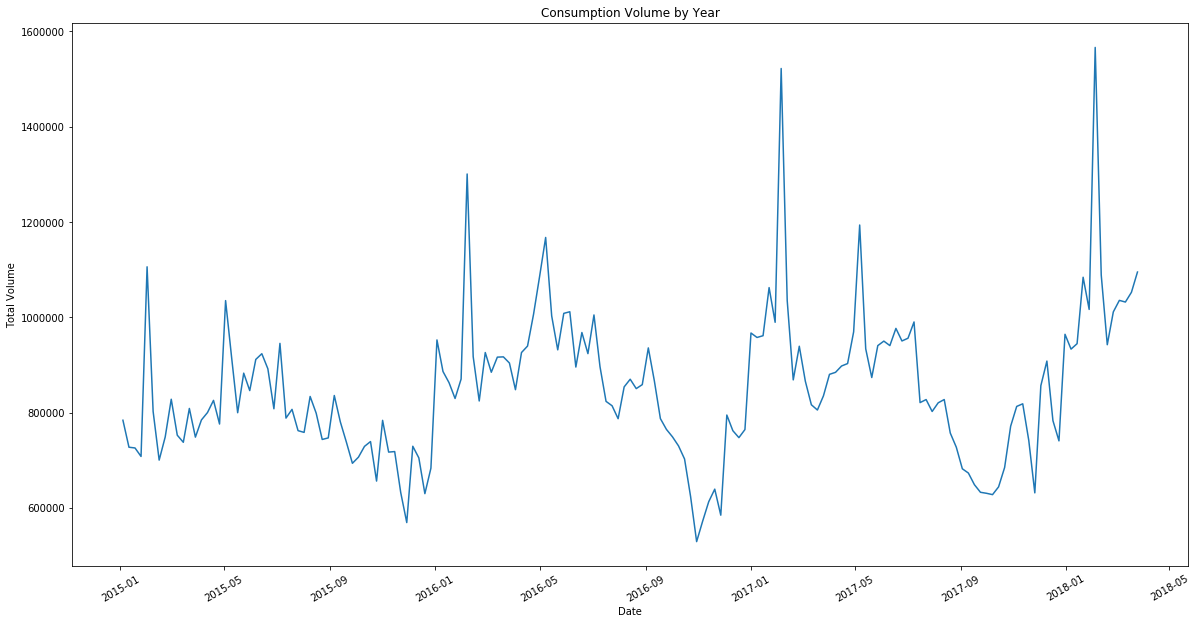

In [42]:
#year=avo['Date'].dt.year
plt.figure(figsize=(20,10))
#ax2=ax.twinx()
ax = sns.lineplot(x='Date', y='Total Volume', data=avo,ci=None)
#ax2.plot(avo['Date'], avo['rolling_'])#, ci=None)
plt.title('Consumption Volume by Year')

plt.xticks(rotation=30)
plt.savefig('cons_vol')

## Building Machine Learning Models

In [15]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#import dtale

In [16]:

y_ = avo[["AveragePrice"]]
X_ = avo.drop(["AveragePrice"], axis=1)
print(X_.shape)
print(y_.shape)

(18249, 13)
(18249, 1)


## Preprocessing

### For categorical features, if ordinal, applied ordinal encoder, and for nominal features, used one hot encoder.

In [17]:
## https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ord_ = OrdinalEncoder()
ohe = OneHotEncoder(drop='first', sparse = False)
scaler = StandardScaler()

#dummify region column
region=pd.get_dummies(X_['region'], drop_first=True)
X_ = pd.concat( (X_.drop(["region"], axis=1).reset_index(drop = True), region), axis = 1 )

#Binary feature encoding; replacing the type {conventional, organic} into {0,1}
X_['type'] = X_['type'].astype(object)
X_['type']=X_['type'].replace({'conventional':0, 'organic':1})

## use standard scaler to standardize numeric columns

X_[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]=scaler.fit_transform(X_[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])

In [18]:
#extract only month and year from the data
X_['year']=X_['Date'].dt.year.astype('float')
X_['month']=X_['Date'].dt.month.astype('float')

In [19]:
X_=X_.drop('Date', axis=1)

### Training and Test data split

In [20]:
np.random.seed(0)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split( X_,y_, test_size = 0.2  )

In [9]:
from joblib import load

### Setting parameters

In [32]:

## Setting parameters

#Rdanfom Forest; bigger tree
rf_params={'max_depth': 15,
           'max_features': 5,
           'max_leaf_nodes': None,
           'min_impurity_decrease': 0.0,
           'min_samples_leaf': 3,
           'min_samples_split': 6,
           'n_estimators': 2000}

xgb_params={'alpha': 0.01}

#Random Forest; smaller tree
rf_params2 = {'max_depth': 8,
              'max_features': 11,
              'max_leaf_nodes': None,
              'min_impurity_decrease': 0.0,
              'min_samples_leaf': 3,
              'min_samples_split': 6,
              'n_estimators': 2500}


In [31]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import  XGBRegressor
from sklearn.linear_model import LinearRegression

### Building models (2 Random Forest, XGBoost, and Linear Regression)

In [39]:
model_rf  = RandomForestRegressor(criterion='mse', oob_score=False, **rf_params, n_jobs=-1)


model_xgb = XGBRegressor(booster = "gblinear", objective = "reg:squarederror",
                               n_jobs = -1,
                               **xgb_params)

model_linear = LinearRegression()

model_rf2  = RandomForestRegressor(criterion='mse', oob_score=False, **rf_params2)

In [13]:
model_rf.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [14]:
model_rf.fit(Xtrain, ytrain)
model_xgb.fit(Xtrain, ytrain)

XGBRegressor(alpha=0.01, base_score=0.5, booster='gblinear',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [15]:
model_rf2.fit(Xtrain, ytrain)
model_linear.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
from joblib import dump

In [19]:
dump(model_rf, './models/RandomForest_1.joblib')
dump(model_xgb, './models/XGBoost.joblib')
dump(model_rf2, './models/RandomForest_2.joblib')
dump(model_linear, './models/Linear.joblib')

['./models/Linear.joblib']

## Ensemble model building

In [20]:
from joblib import load

In [22]:
m_rf = load('./models/RandomForest_1.joblib')
m_xgb = load('./models/XGBoost.joblib')
m_rf2 = load('./models/RandomForest_2.joblib')
m_lnr = load('./models/Linear.joblib')

In [23]:
models = [m_rf, m_xgb, m_rf2, m_lnr]

In [ ]:
from functools import reduce

def ensemble(X_, models, threshold = None):
    if threshold == None:
        threshold = (len(models))
    predictions = []
    for model in models:
        predictions.append(pd.Series(model.predict(X_).reshape(-1)))
    
    y_sum = reduce(lambda x, y: x+y, predictions)
    return y_sum.apply(lambda x: x/threshold)

In [ ]:
y_pred = ensemble(Xtest, models)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score 
import statsmodels.api as sm

# model evaluation 
mse = mean_squared_error(ytest,y_pred) 
  
rmse = np.sqrt(mean_squared_error(ytest, y_pred)) 
r2 = r2_score(ytest, y_pred) 
  
# printing values # Ran in on Google Colab due to comutational power limitation
print('MSE:',mse) #MSE: 0.05845076789912308
print('Root mean squared error: ', rmse) #Root mean squared error:  0.24176593618440767
print("R2 score : %.2f" % r2_score(ytest,y_pred)) #R2 score : 0.64

## Comparing the scores of ensemble model with other models

In [28]:
from sklearn.metrics import mean_squared_error, r2_score 
import statsmodels.api as sm

m_rf_pred = m_rf.predict(Xtest)

# model evaluation 
mse = mean_squared_error(ytest,m_rf_pred) 
  
rmse = np.sqrt(mean_squared_error(ytest, m_rf_pred)) 
r2 = r2_score(ytest, m_rf_pred) 
  
# printing values 
print('MSE:',mse) 
print('Root mean squared error: ', rmse)
print("R2 score : %.2f" % r2_score(ytest,m_rf_pred))

MSE: 0.037471634259717466
Root mean squared error:  0.19357591342860161
R2 score : 0.77


In [30]:
## seems like XGBoost model did not predict as accurately as Random Forest model.


m_xgb_pred = m_xgb.predict(Xtest)

# model evaluation 
mse = mean_squared_error(ytest,m_xgb_pred) 
  
rmse = np.sqrt(mean_squared_error(ytest, m_xgb_pred)) 
r2 = r2_score(ytest, m_xgb_pred) 
  
# printing values 
print('MSE:',mse) 
print('Root mean squared error: ', rmse)
print("R2 score : %.2f" % r2_score(ytest,m_xgb_pred))

MSE: 0.13255312702093103
Root mean squared error:  0.364078462726005
R2 score : 0.19


In [31]:

m_rf2_pred = m_rf2.predict(Xtest)

# model evaluation 
mse = mean_squared_error(ytest,m_rf2_pred) 
  
rmse = np.sqrt(mean_squared_error(ytest, m_rf2_pred)) 
r2 = r2_score(ytest, m_rf2_pred) 
  
# printing values 
print('MSE:',mse) 
print('Root mean squared error: ', rmse)
print("R2 score : %.2f" % r2_score(ytest,m_rf2_pred))

MSE: 0.05065687062293029
Root mean squared error:  0.22507081246338959
R2 score : 0.69


In [34]:

m_lnr_pred = m_lnr.predict(Xtest)

# model evaluation 
mse = mean_squared_error(ytest,m_lnr_pred) 
  
rmse = np.sqrt(mean_squared_error(ytest, m_lnr_pred)) 
r2 = r2_score(ytest, m_lnr_pred) 
  
# printing values 
print('MSE:',mse) 
print('Root mean squared error: ', rmse)
print("R2 score : %.2f" % r2_score(ytest,m_lnr_pred))

MSE: 0.0676350103807107
Root mean squared error:  0.2600673189401365
R2 score : 0.58


### Ensemble model and random Forest 1 did the best job in prediciting avocado price

### Next step: feature engineering and gridsearch for better parameters

#### 1. Find mode data on avocado prices (other fruits and vegetables, etc.) and add/remove features
#### 2. Dimension reduction (PCA, etc.)
#### 3. Tune parameters (due to the limitation on the computational power, have not tried gridsearch too many times for this project.)

### 1. feature engineering: simply removing many features for their muticollinearities

In [28]:
#Checking VIF scores (muticollinearities)

from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif_data = pd.DataFrame() 
# vif_data["feature"] = X_.columns
# vif_data["VIF"] = [variance_inflation_factor(X_.values, i) 
#                           for i in range(len(X_.columns))] 
print(vif_data.nlargest(10, 'VIF'))

         feature           VIF
5     Total Bags  2.370316e+14
6     Small Bags  1.364727e+14
7     Large Bags  1.452774e+13
8    XLarge Bags  7.646439e+10
1   Total Volume  5.185465e+09
2           4046  6.957119e+08
3           4225  6.303646e+08
4           4770  5.020680e+06
10          year  7.970664e+01
64         month  1.031299e+01


In [45]:
## dropping any features that have VIF higher than 5 
## reference https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
X_exp = X_.drop(['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', '4046', '4225', '4770'], axis=1)

In [46]:
np.random.seed(0)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split( X_exp,y_, test_size = 0.2  )

In [35]:
model_rf.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score 
import statsmodels.api as sm

m_rf_pred = model_rf.predict(Xtest)

# model evaluation 
mse = mean_squared_error(ytest,m_rf_pred) 
  
rmse = np.sqrt(mean_squared_error(ytest, m_rf_pred)) 
r2 = r2_score(ytest, m_rf_pred) 
  
# printing values 
print('MSE:',mse) 
print('Root mean squared error: ', rmse) 
print("R2 score : %.2f" % r2_score(ytest,m_rf_pred))

MSE: 0.049178604797353795
Root mean squared error:  0.22176249637247908
R2 score : 0.70


In [47]:
model_linear.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:

m_lnr_pred = model_linear.predict(Xtest)

# model evaluation 
mse = mean_squared_error(ytest,m_lnr_pred) 
  
rmse = np.sqrt(mean_squared_error(ytest, m_lnr_pred)) 
r2 = r2_score(ytest, m_lnr_pred) 
  
# printing values 
print('MSE:',mse) 
print('Root mean squared error: ', rmse)
print("R2 score : %.2f" % r2_score(ytest,m_lnr_pred))

MSE: 0.06784523527365227
Root mean squared error:  0.26047117935321035
R2 score : 0.58


## Removing features did not improves the accuracy scores for both random forest and linear regression. Hence, it is concluded that multicollinearities of features did not affect the scores.

## 2. Grid Searching and Cross Validation:
## See the other script.